# **A Complete Data Analysis on Machine Predictive Maintenance Classification**

## This will cover:

### Data Overview:

1. Check the dataset size (rows and columns).

2. Identify column types (numerical, categorical).

3. Display the summary statistics (mean, median, mode, etc.) for numerical columns.




### Handling Missing Values:

1. Identify any missing values in the dataset.

2. Decide on strategies for handling them (imputation or removal).

3. Apply the chosen strategy and note any changes made to the dataset.






### Detecting Outliers:

1. Use methods like box plots or statistical thresholds (e.g., Z-scores) to detect outliers in numerical columns.

2. Investigate the impact of outliers on the dataset and decide whether to remove or adjust them.

### Univariate Analysis:

1. Analyze individual variables using histograms, box plots, and descriptive statistics.

2. Investigate the distribution of data for both numerical and categorical variables.

3. Provide insights on the data's spread, central tendency, and skewness.

### Bivariate and Multivariate Analysis:

1. Explore relationships between variables using scatter plots, correlation matrices, or pair plots.

2. Identify patterns or correlations between numerical variables.

3. For categorical data, consider cross-tabulations or stacked bar charts.

### Data Visualization:

1. Utilize various visual tools such as bar charts, line plots, heatmaps, etc., to better understand data distributions and relationships.

2. Create clear, informative visualizations that convey key insights from the dataset.

3. Identifying Patterns and Trends:
Look for patterns over time (if applicable) or across different categories (e.g., country, group, etc.).

4. Identify seasonal trends, growth patterns, or changes in data across time periods or categories.

5. Hypothesis Testing
Formulate initial hypotheses based on the dataset (e.g., differences between groups, trends over time).

6. Use statistical tests (e.g., t-tests, chi-squared tests) to validate your hypotheses.

Summarize the findings of your hypothesis testing, providing evidence to support or reject your assumptions.

# Load the Dataset

Here is the link: https://github.com/ciol-researchlab/CIOL-Winter-ML-Bootcamp.git

In [6]:
! git clone https://github.com/ciol-researchlab/CIOL-Winter-ML-Bootcamp.git

fatal: destination path 'CIOL-Winter-ML-Bootcamp' already exists and is not an empty directory.


# Import All Required Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Load the assign dataset.

I am working with ***Machine Predictive Maintenance Classification Dataset***

In [8]:
# Load the dataset
data_path = "/content/CIOL-Winter-ML-Bootcamp/datasets/session1/assignment/o2/data.csv"
data = pd.read_csv(data_path)

# Overview of Dataset

In this section, we will conduct a initial statistical view of our dataset. From this view, we will build plan to go further with our data to get deep insights that defines the overall story

In [9]:
# Data Overview
print("Dataset Shape:", data.shape)
print("\nColumn Types:\n", data.dtypes)
print("\nSummary Statistics:\n", data.describe())

# Handling Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

Dataset Shape: (10000, 10)

Column Types:
 UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

Summary Statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000         

Column          |         Types |  Purpose:
1. UDI   |                          int64 | unique identifier ranging from 1 to 10000
2. Product ID          |        object | consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
3. Type         |               object|  generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
4. Air temperature [K]    |    float64|  generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
5. Process temperature [K] |   float64|  calculated from powepower of 2860 W, overlaid with a normally distributed noise
6. Rotational speed [rpm]   |    int64|  calculated from powepower of 2860 W, overlaid with a normally distributed noise
7. Torque [Nm]      |          float64|  torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
8. Tool wear [min]      |        int64| The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
9. Target         |              int64 | It checks wheather there is any failure or not, 1 for failure, 0 for non failure
10. Failure Type     |           object|  Different types of failure

# identifying missing values

In [10]:
# Imputation Strategy
if missing_values.any():
    # Example: Fill missing numerical columns with mean and categorical with mode
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

# Check again for missing values
print("\nMissing Values After Imputation:\n", data.isnull().sum())


Missing Values After Imputation:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


# Outline detections for pettern recongnition or getting ideas about anomalies

In [11]:
# Detecting Outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numerical_cols:
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    outliers[col] = data.loc[abs(z_scores) > 3]

print("\nOutliers Detected:\n")
for col, outlier_data in outliers.items():
    print(f"{col}: {outlier_data.shape[0]} outliers")


Outliers Detected:

UDI: 0 outliers
Air temperature [K]: 0 outliers
Process temperature [K]: 0 outliers
Rotational speed [rpm]: 164 outliers
Torque [Nm]: 25 outliers
Tool wear [min]: 0 outliers
Target: 339 outliers


Although there is very few outlines in Torque, huge amount of outlines in rotational speed & target are detected. Since, our purpose isn't to build a ML model, we won't remove these outlines. But, these outlines will visually help us to detect anomalies, patterns & trends

# Outlines visualizations using boxplot

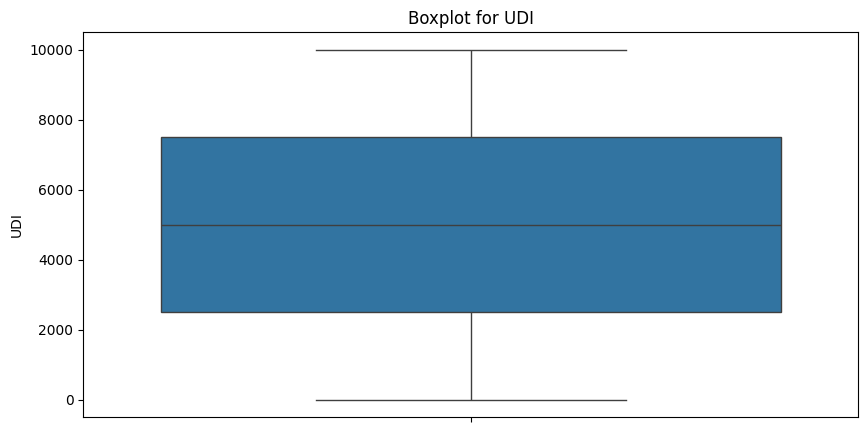

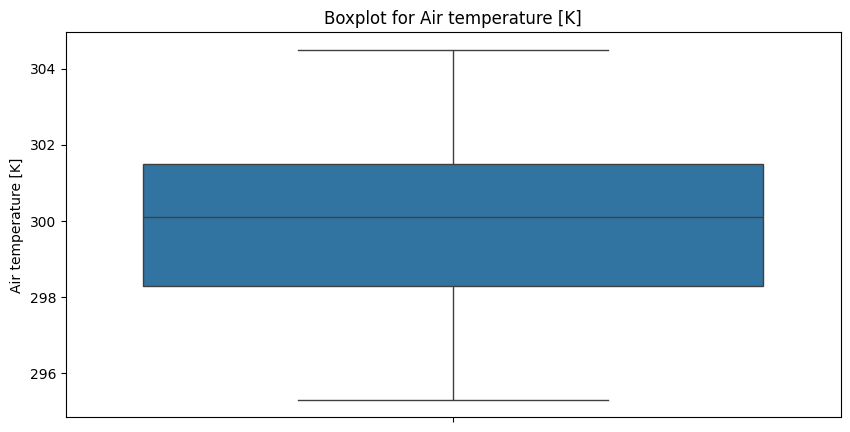

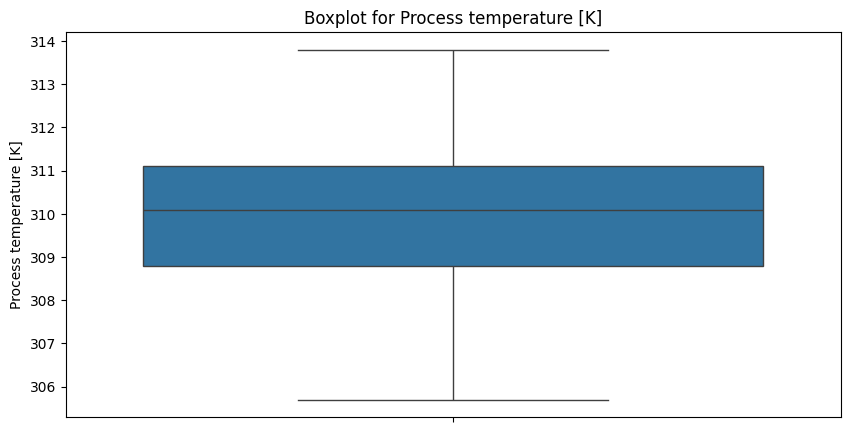

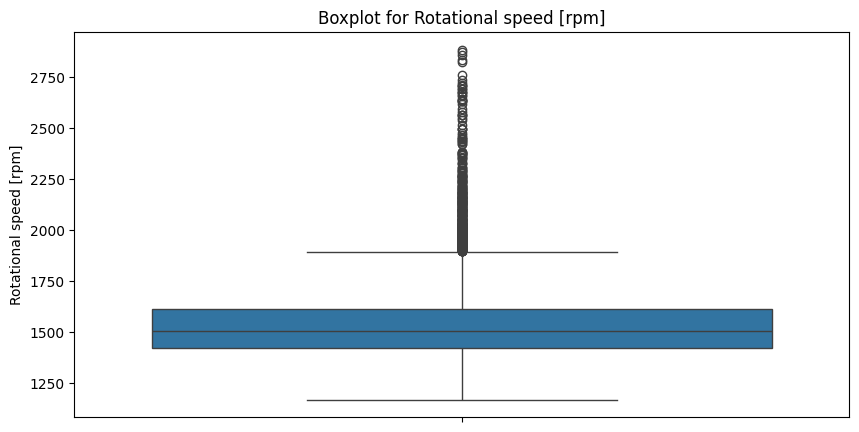

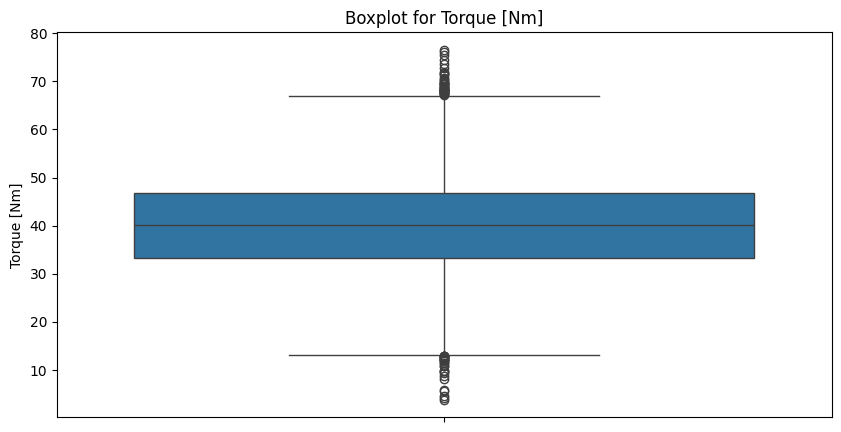

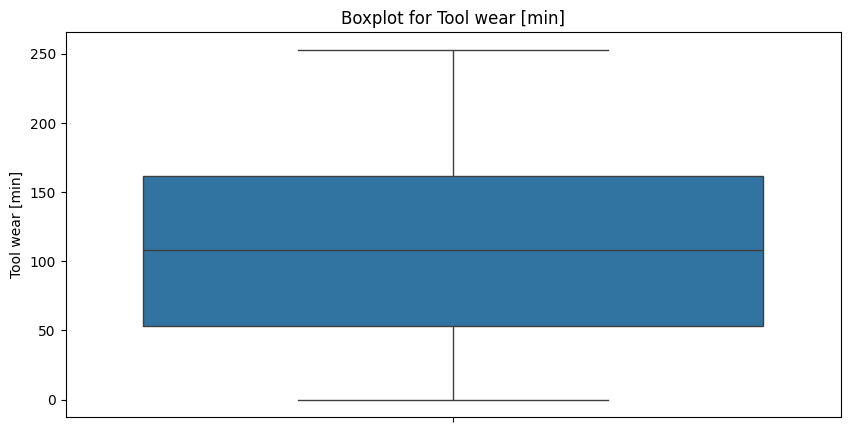

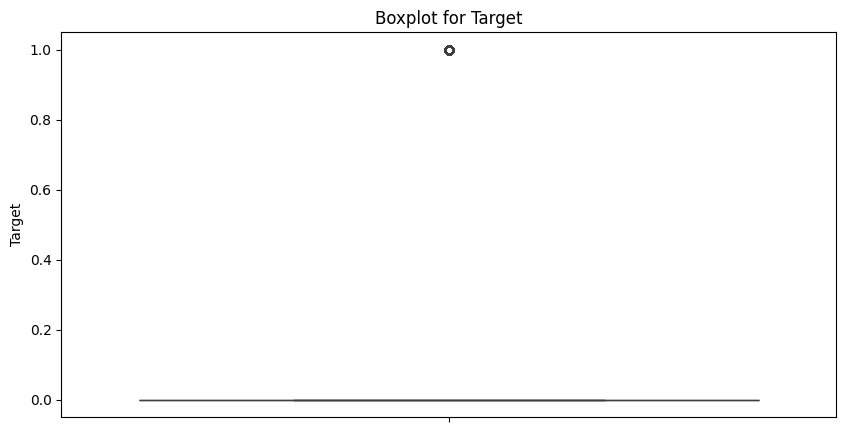

In [12]:
# Visualize Outliers using Box Plots
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Histogram for all numerical categories

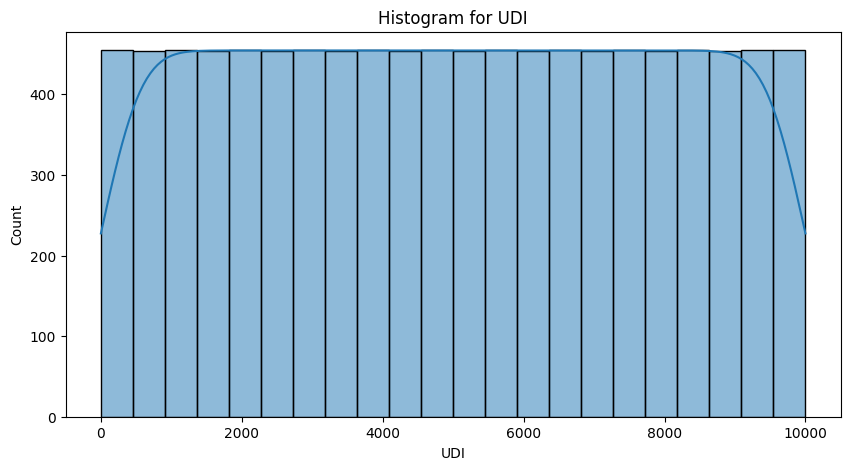

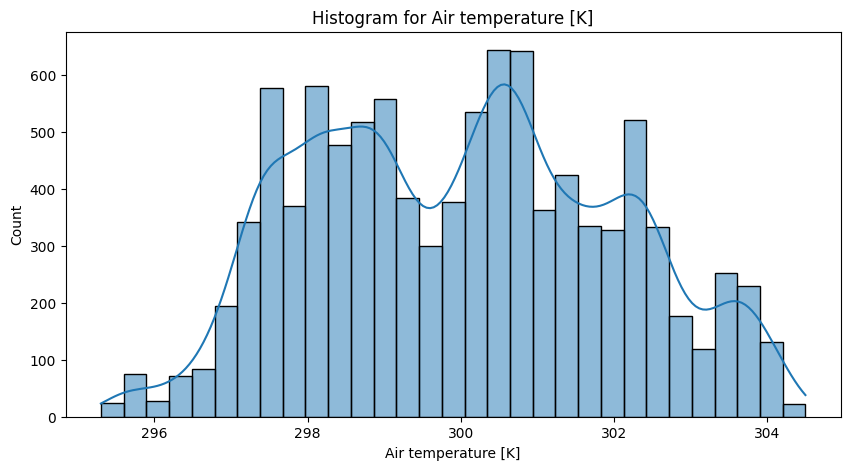

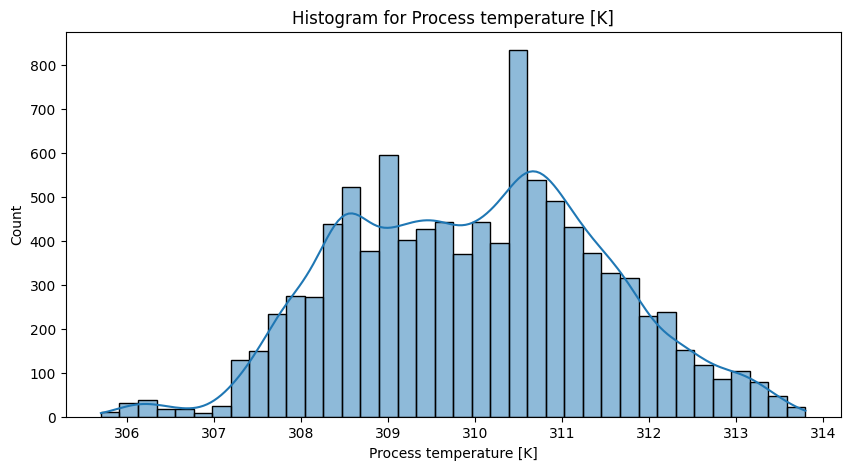

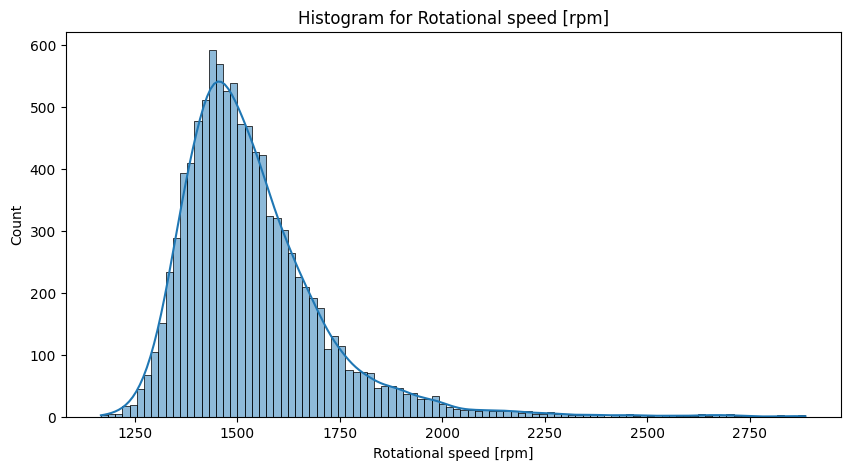

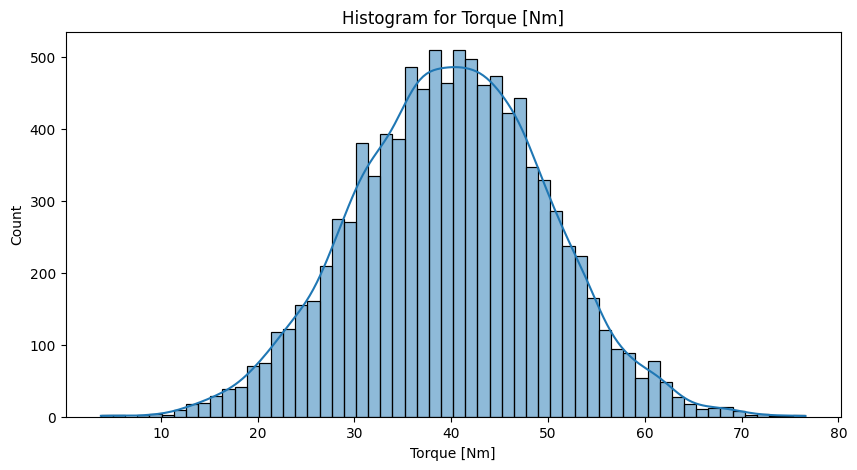

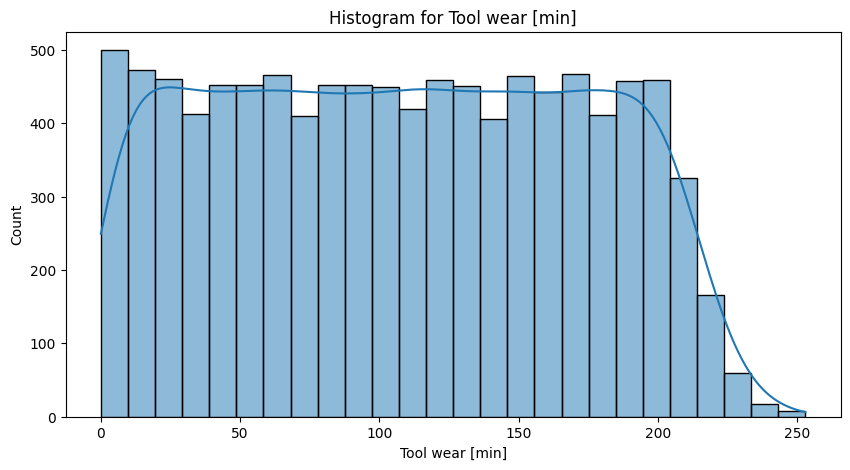

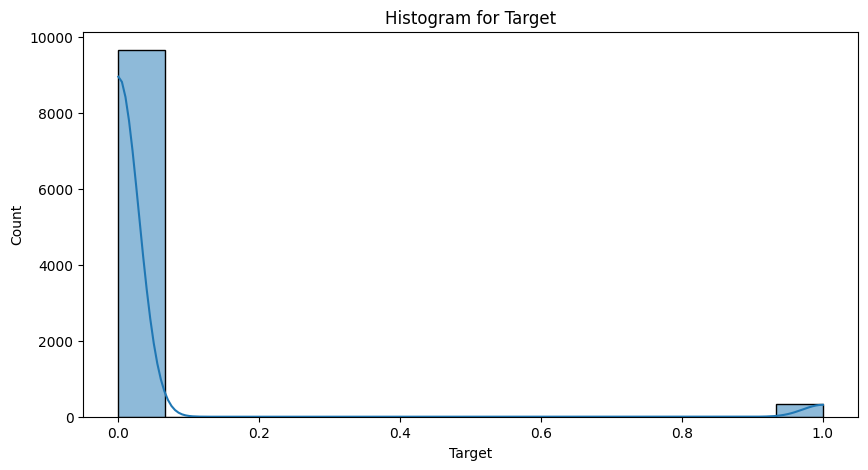

In [13]:
# Univariate Analysis
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

# Ploting for total samples at individual classes

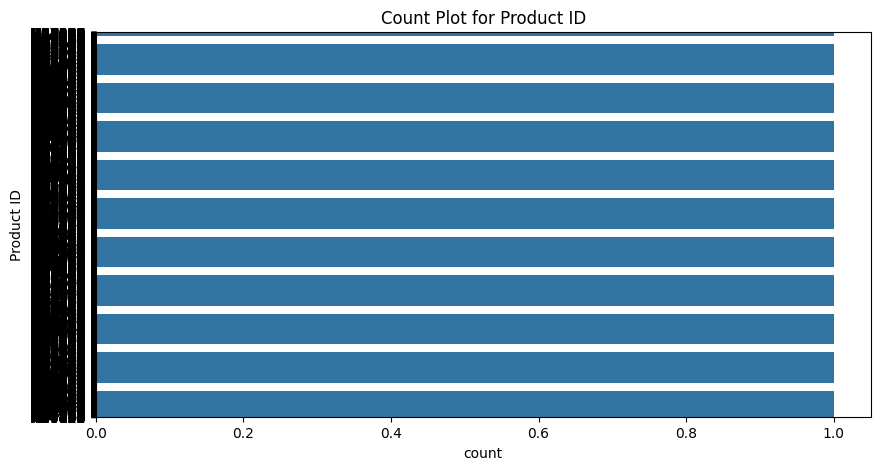

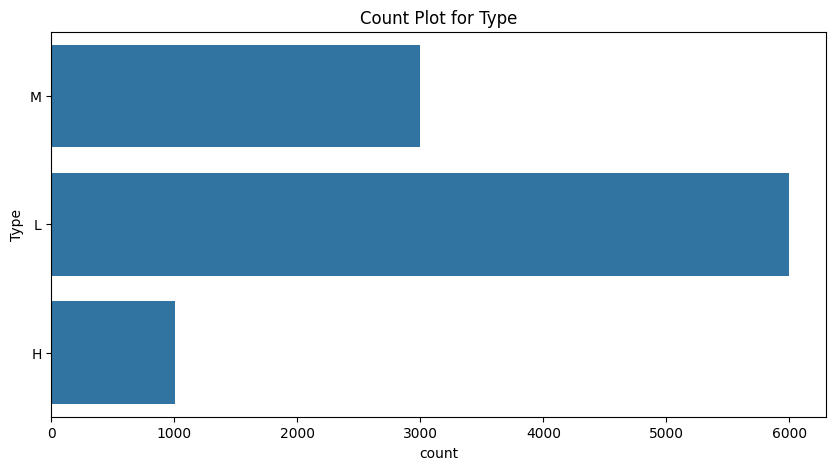

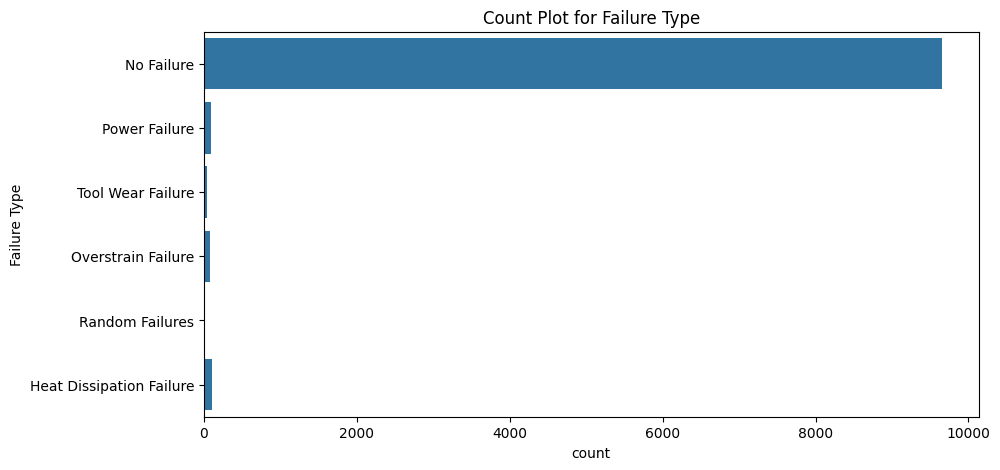

In [14]:
# Categorical Variable Analysis
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(f"Count Plot for {col}")
    plt.show()

# Correlation matrix Visualization

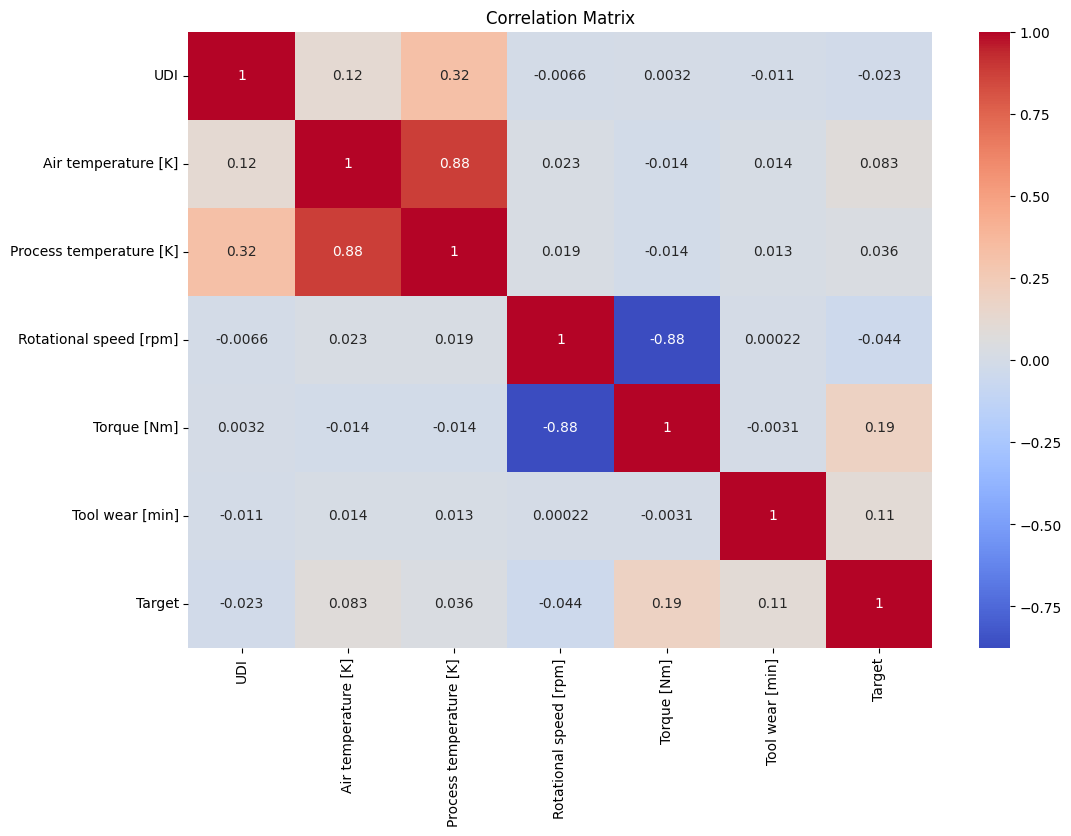

In [15]:
# Exclude non-numeric columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Pairplot for all categories

Helps to identify pattern, trend, storng-weak relations between categories

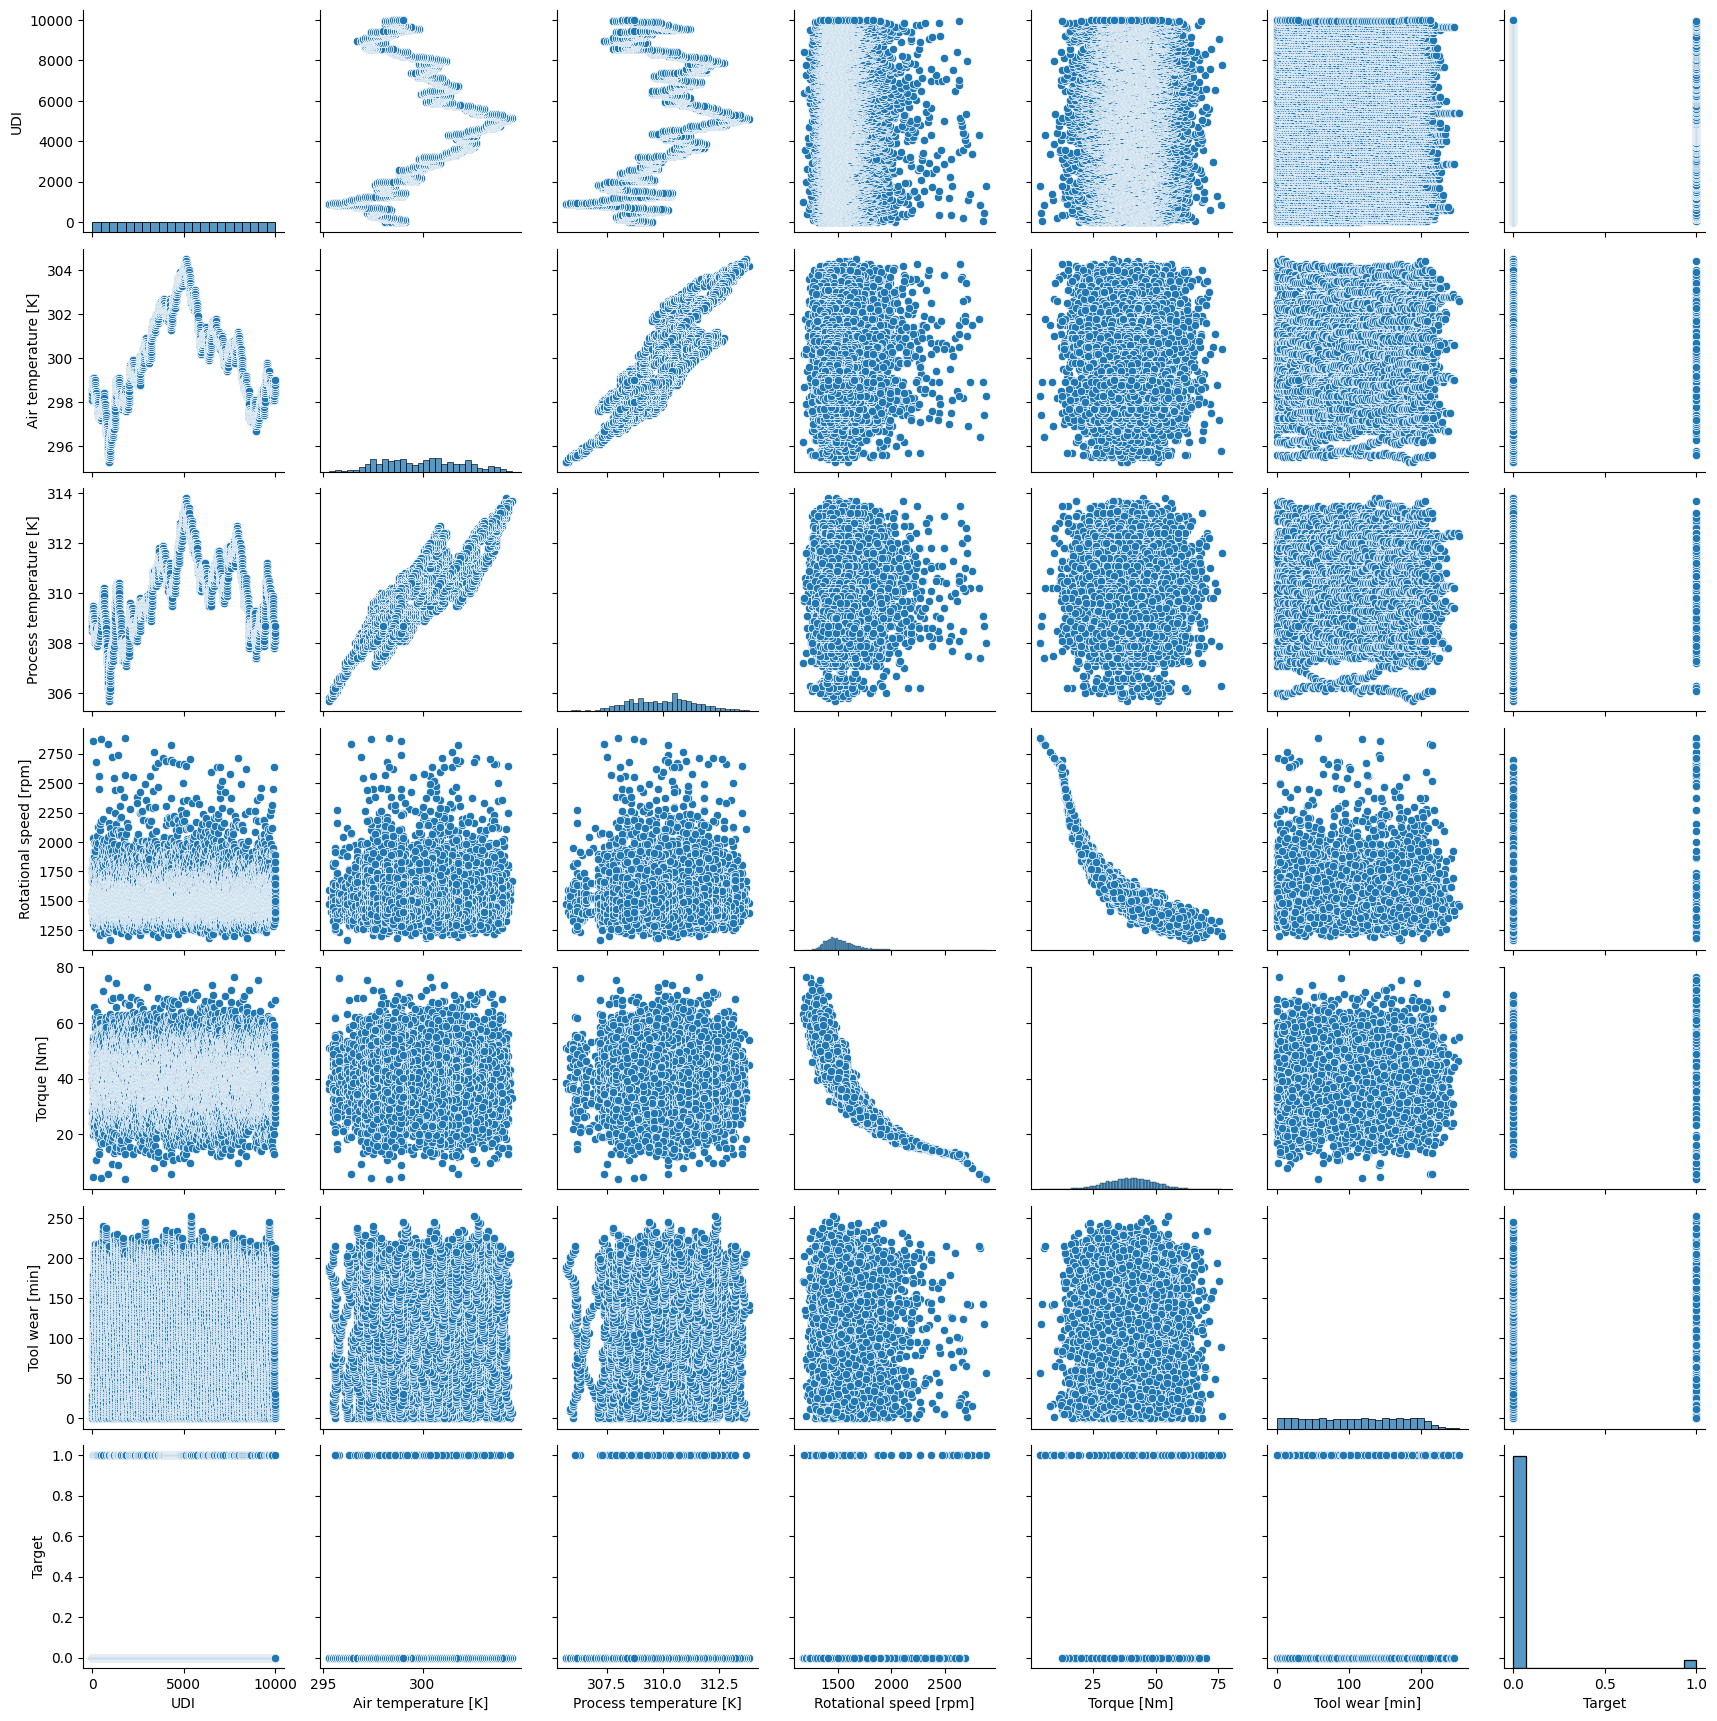

In [16]:
# Pair Plot for Numerical Variables
sns.pairplot(data[numerical_cols])
plt.show()

# Hypothese Testing to get insightful information and understand the entire story

Including:

1. T-test
2. ANOVA Test
3. Chi-stat
4. Logistic Regression

In [17]:
# Hypothesis Testing
# Example: t-test between torque values for two failure types
from scipy.stats import ttest_ind
failure_data = data[data['Failure Type'] != 'No Failure']
no_failure_data = data[data['Failure Type'] == 'No Failure']

t_stat, p_value = ttest_ind(failure_data['Torque [Nm]'], no_failure_data['Torque [Nm]'])
print("\nT-Test Results:")
print(f"t-statistic: {t_stat}, p-value: {p_value}")


T-Test Results:
t-statistic: 19.515847298127404, p-value: 2.8211216481892877e-83


In [19]:


# Grouping data by product quality
low_quality = data[data['Product ID'].str.startswith('L')]['Rotational speed [rpm]']
medium_quality = data[data['Product ID'].str.startswith('M')]['Rotational speed [rpm]']
high_quality = data[data['Product ID'].str.startswith('H')]['Rotational speed [rpm]']

# Perform ANOVA
f_stat, p_value = f_oneway(low_quality, medium_quality, high_quality)
print("ANOVA Results:")
print(f"F-statistic: {f_stat}, p-value: {p_value}")


ANOVA Results:
F-statistic: 0.11557801975976523, p-value: 0.8908522559039298


In [20]:


# Creating a contingency table
contingency_table = pd.crosstab(data['Product ID'].str[0], data['Target'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Results:")
print(f"Chi2-statistic: {chi2_stat}, p-value: {p_value}")


Chi-Square Test Results:
Chi2-statistic: 13.75171680114931, p-value: 0.0010324110359454081


In [21]:
# Grouping data
failure_tool_wear = data[data['Target'] == 1]['Tool wear [min]']
non_failure_tool_wear = data[data['Target'] == 0]['Tool wear [min]']

# Perform T-Test
t_stat, p_value = ttest_ind(failure_tool_wear, non_failure_tool_wear)
print("T-Test Results (Tool Wear):")
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-Test Results (Tool Wear):
T-statistic: 10.602880588762876, p-value: 3.9760759628693964e-26


In [22]:


# Preparing data
X = data[['Torque [Nm]', 'Rotational speed [rpm]', 'Process temperature [K]']]
y = data['Target']

# Adding a constant for the regression
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.110317
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 31 Dec 2024   Pseudo R-squ.:                  0.2549
Time:                        16:04:41   Log-Likelihood:                -1103.2
converged:                       True   LL-Null:                       -1480.5
Covariance Type:            nonrobust   LLR p-value:                3.000e-163
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -79.1661     12.856     -6.158      0.000    -104.362   

# Visualization to investigate reasons behind these failures

## Torque behind failure

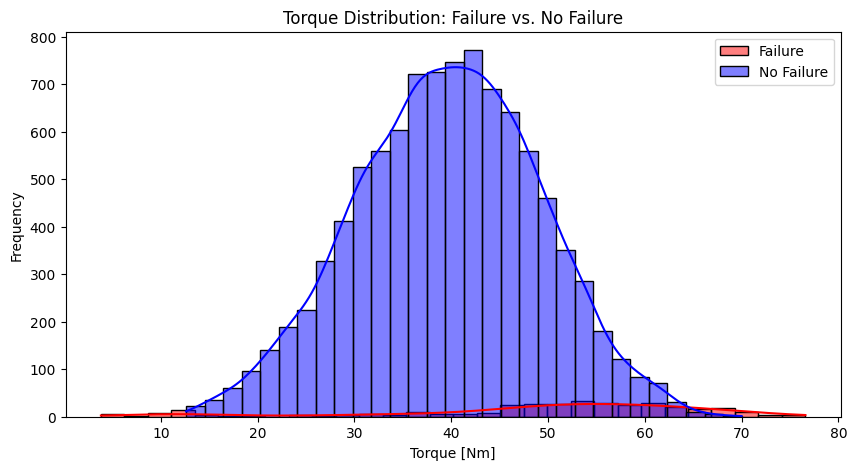

In [23]:
# Visualize Torque Distribution for Failure and Non-Failure
plt.figure(figsize=(10, 5))
sns.histplot(failure_data['Torque [Nm]'], kde=True, color='red', label='Failure', bins=30)
sns.histplot(no_failure_data['Torque [Nm]'], kde=True, color='blue', label='No Failure', bins=30)
plt.title("Torque Distribution: Failure vs. No Failure")
plt.xlabel("Torque [Nm]")
plt.ylabel("Frequency")
plt.legend()
plt.show()


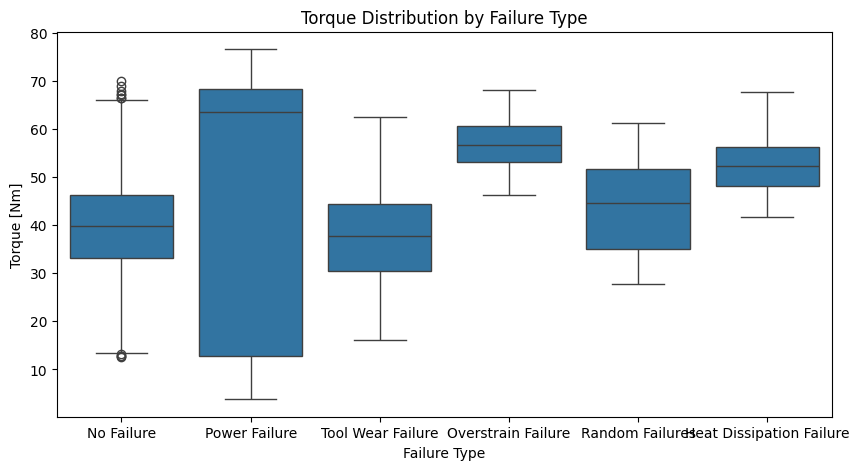

In [24]:
# Boxplot for Torque by Failure Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Failure Type', y='Torque [Nm]', data=data)
plt.title("Torque Distribution by Failure Type")
plt.xlabel("Failure Type")
plt.ylabel("Torque [Nm]")
plt.show()

## Rotation Speed to determine failure

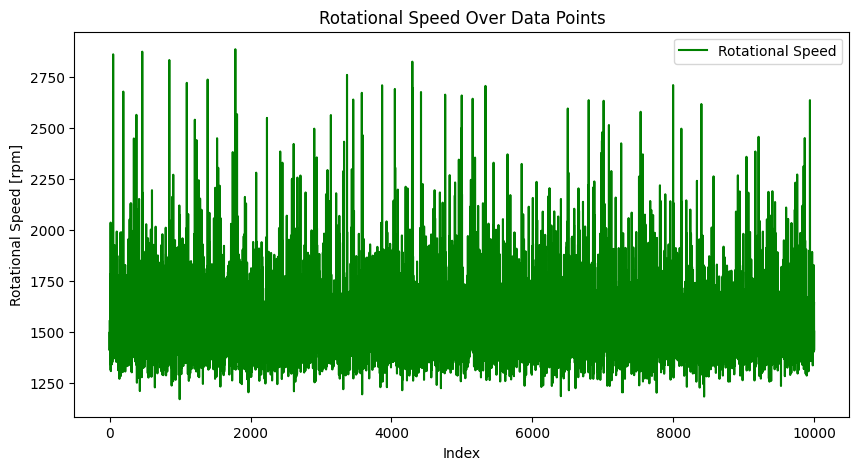

In [25]:
# Line Plot: Rotational Speed over Index
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Rotational speed [rpm]'], label='Rotational Speed', color='green')
plt.title("Rotational Speed Over Data Points")
plt.xlabel("Index")
plt.ylabel("Rotational Speed [rpm]")
plt.legend()
plt.show()

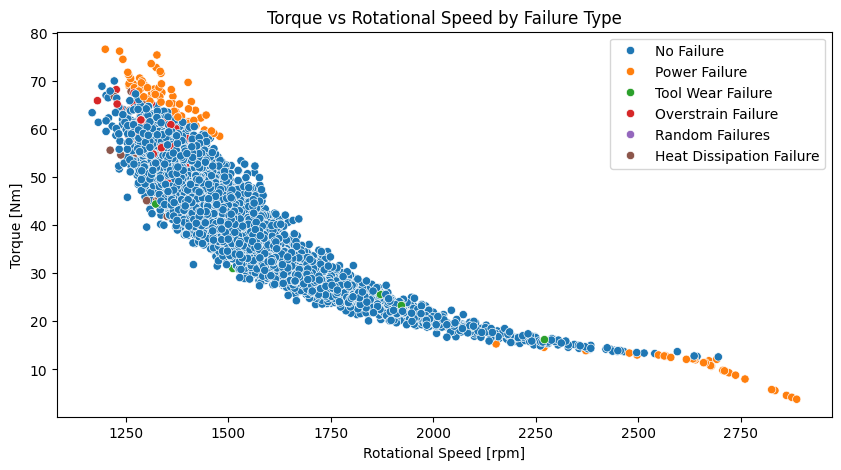

In [26]:
# Scatter Plot: Torque vs Rotational Speed
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', data=data)
plt.title("Torque vs Rotational Speed by Failure Type")
plt.xlabel("Rotational Speed [rpm]")
plt.ylabel("Torque [Nm]")
plt.legend()
plt.show()

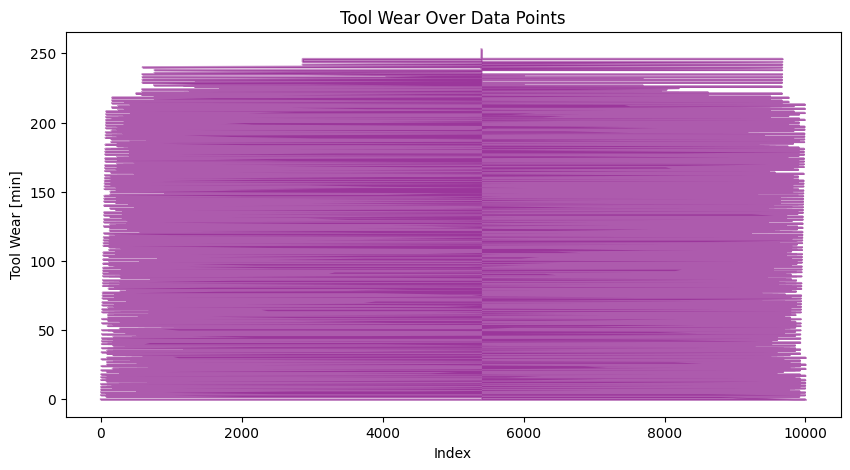

In [27]:
# Area Plot: Tool Wear Distribution Over Index
plt.figure(figsize=(10, 5))
data.sort_values(by='Tool wear [min]', inplace=True)
data['Tool wear [min]'].plot(kind='area', alpha=0.4, color='purple')
plt.title("Tool Wear Over Data Points")
plt.xlabel("Index")
plt.ylabel("Tool Wear [min]")
plt.show()

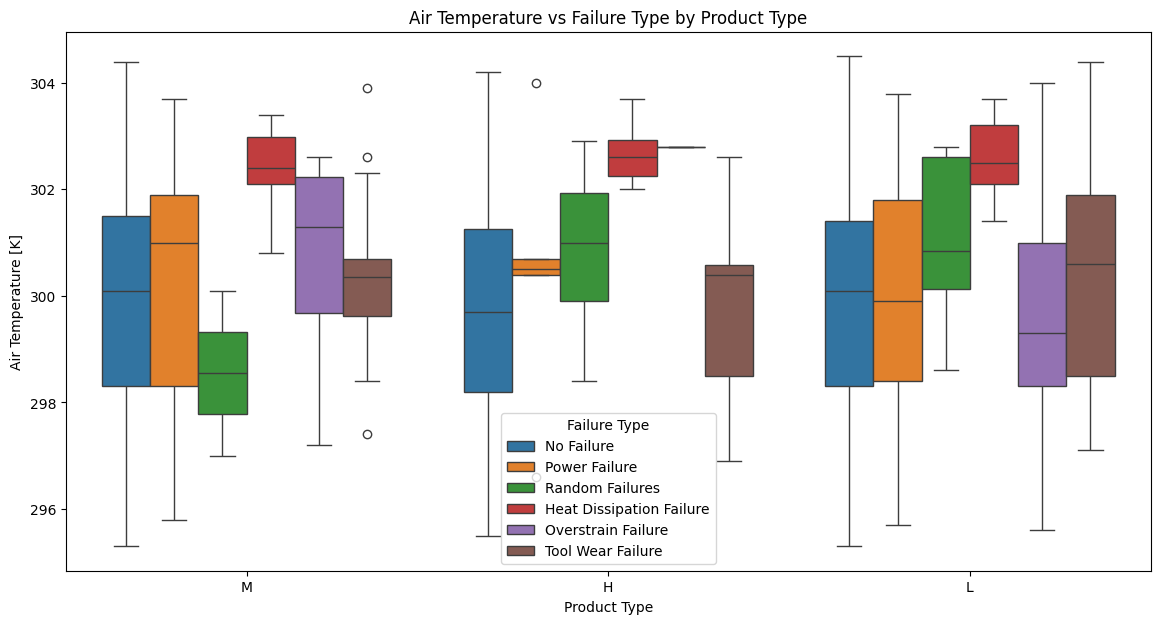

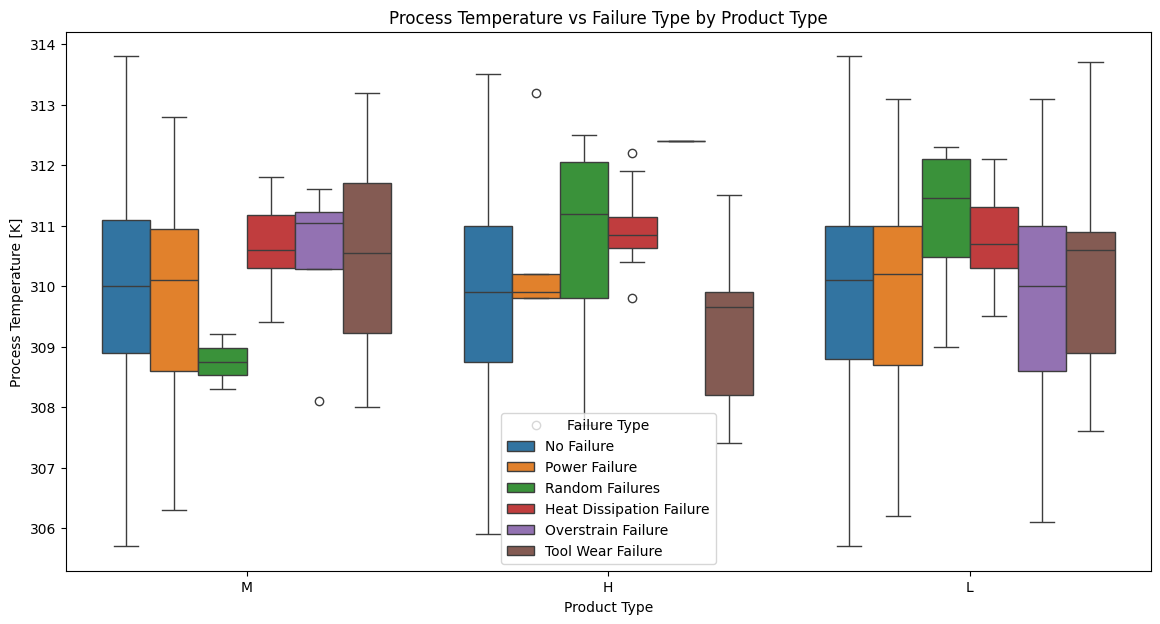

In [28]:
# Visualization: Failures vs Temperatures for Product Types
plt.figure(figsize=(14, 7))
sns.boxplot(x='Type', y='Air temperature [K]', hue='Failure Type', data=data)
plt.title("Air Temperature vs Failure Type by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Air Temperature [K]")
plt.legend(title="Failure Type")
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Type', y='Process temperature [K]', hue='Failure Type', data=data)
plt.title("Process Temperature vs Failure Type by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Process Temperature [K]")
plt.legend(title="Failure Type")
plt.show()

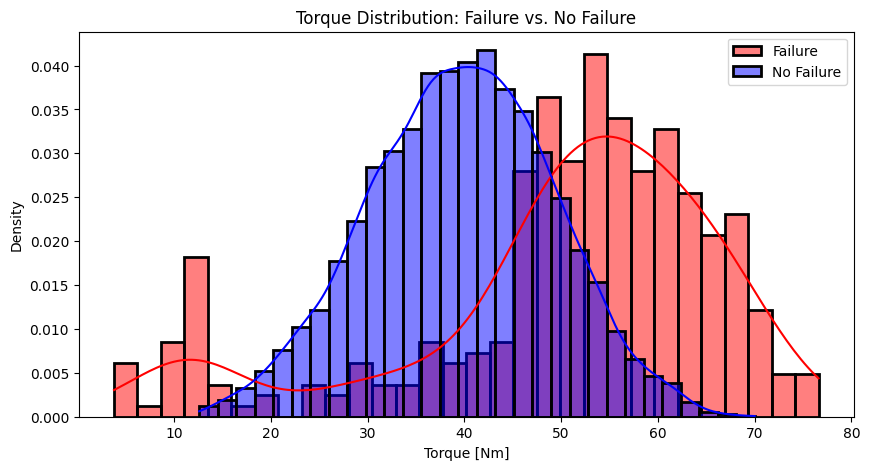

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame with the provided columns
# Separate the data based on the 'Target' column
failure_data = data[data['Target'] == 1]
no_failure_data = data[data['Target'] == 0]

# Plot the distributions
plt.figure(figsize=(10, 5))

# Plotting the 'Failure' data in red
sns.histplot(failure_data['Torque [Nm]'], kde=True, color='red', label='Failure', bins=30, stat='density', linewidth=2)

# Plotting the 'No Failure' data in blue
sns.histplot(no_failure_data['Torque [Nm]'], kde=True, color='blue', label='No Failure', bins=30, stat='density', linewidth=2)

# Adding title and labels
plt.title("Torque Distribution: Failure vs. No Failure")
plt.xlabel("Torque [Nm]")
plt.ylabel("Density")

# Adding a legend
plt.legend()

# Display the plot
plt.show()
